# Spline Interpolation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from math import sqrt

In [0]:
def linearLagrange(point1, point2):
  x0, y0 = point1
  x1, y1 = point2
  func = lambda x: (((x-x1)*y0)/(x0-x1)) + (((x-x0)*y1)/(x1-x0))
  return func

In [0]:
fDD = lambda x0,x1,y0,y1:(y1 - y0)/(x1 - x0)
sDD = lambda x0,x1,x2,y0,y1,y2: (fDD(x1,x2,y1,y2) - fDD(x0,x1,y0,y1))/(x2-x0)
tDD = lambda x0,x1,x2,x3,y0,y1,y2,y3: (sDD(x1,x2,x3,y1,y2,y3) - sDD(x0,x1,x2,y0,y1,y2))/(x3-x0)

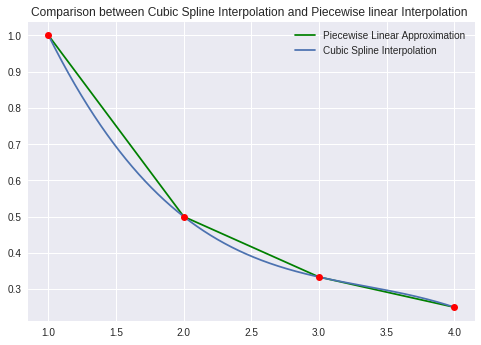

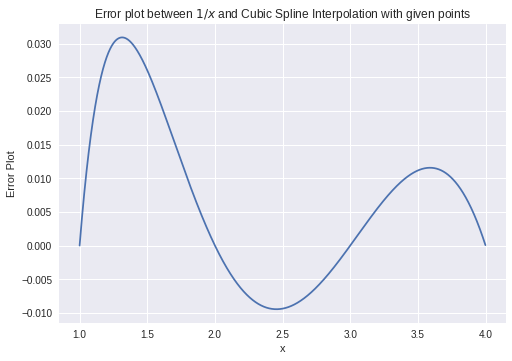

In [4]:
x = [1,2,3,4]
y = [1,1/2,1/3,1/4]
cs = CubicSpline(x,y)

point1 = (1, 1)
point2 = (2, 1/2)
point3 = (3, 1/3)
point4 = (4, 1/4)


plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(1,2,0.0001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r),'g', label="Piecewise Linear Approximation")

r = np.arange(2,3,0.0001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(3,4,0.0001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(1,4,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')
plt.savefig('i1.png')
plt.legend()
plt.show()

plt.title("Error plot between $1/x$ and Cubic Spline Interpolation with given points")
plt.xlabel("x")
plt.ylabel("Error Plot")
plt.plot(r, cs(r)-1/r)
plt.show()

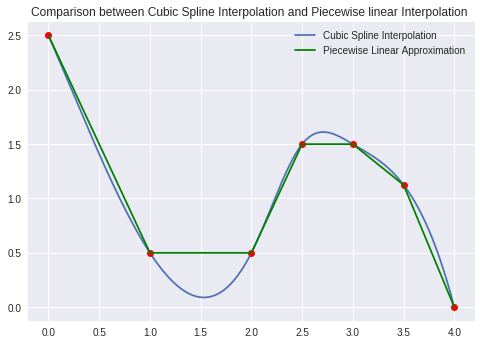

In [5]:
x = [0,1,2,2.5,3,3.5,4]
y = [2.5,0.5,0.5,1.5,1.5,1.125,0]
cs = CubicSpline(x,y)


point1 = (0  , 2.5)
point2 = (1  , 0.5)
point3 = (2  , 0.5)
point4 = (2.5, 1.5)
point5 = (3  , 1.5)
point6 = (3.5, 1.125)
point7 = (4  , 0)

plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(0,4,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')

r = np.arange(0,1,0.00001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r), 'g', label="Piecewise Linear Approximation")

r = np.arange(1,2,0.00001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(2,2.5,0.00001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(2.5,3,0.00001)
f = linearLagrange(point4, point5)
plt.plot(r, f(r), 'g')

r = np.arange(3,3.5,0.00001)
f = linearLagrange(point5, point6)
plt.plot(r, f(r), 'g')

r = np.arange(3.5,4,0.00001)
f = linearLagrange(point6, point7)
plt.plot(r, f(r), 'g')
plt.legend()
plt.show()

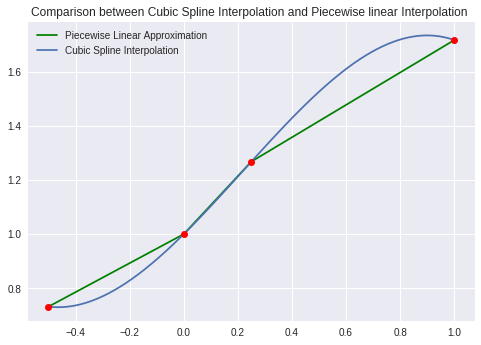

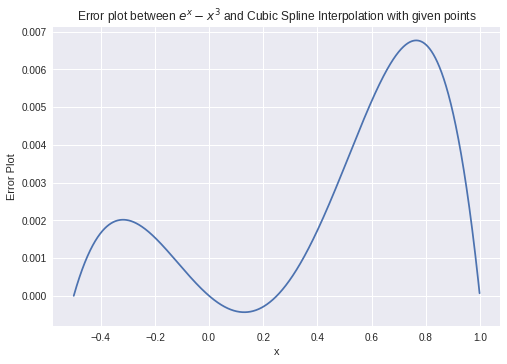

In [6]:
x = [-0.5,0,0.25,1]
y = [0.731531,1.000000,1.268400,1.718282]
cs = CubicSpline(x,y)

point1 = (-0.5,  0.731531)
point2 = ( 0.0,  1.000000)
point3 = ( 0.25, 1.268400)
point4 = ( 1.00, 1.718282)


plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(-0.5,0.0, 0.0001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r),'g', label="Piecewise Linear Approximation")

r = np.arange(0.0,0.25, 0.0001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(0.25,1.00,0.0001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(-0.5,1.00,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')
plt.legend()
plt.show()

plt.title("Error plot between $e^x - x^3$ and Cubic Spline Interpolation with given points")
plt.xlabel("x")
plt.ylabel("Error Plot")
plt.plot(r, cs(r)-np.exp(r)+r**3)
plt.show()

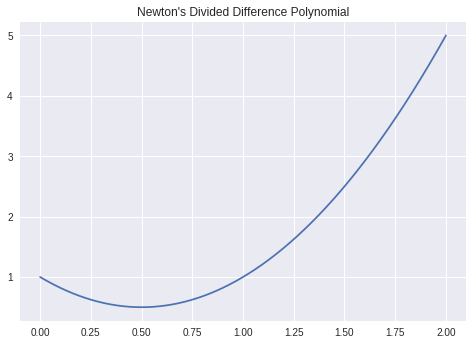

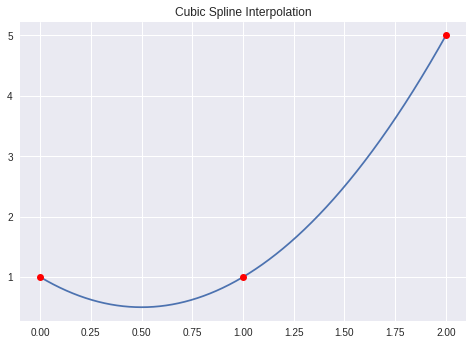

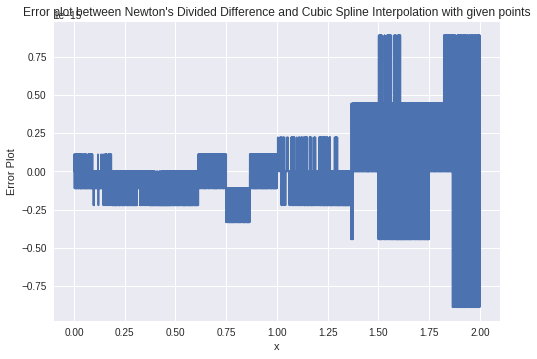

In [7]:
point1 = [0,1]
point2 = [1,1]
point3 = [2,5]

x0,y0 = point1
x1,y1 = point2
x2,y2 = point3

x = [0,1,2]
y = [1,1,5]
cs = CubicSpline(x,y)


f2 = lambda x: y0 + (x-x0)*fDD(x0,x1,y0,y1) + (x-x0)*(x-x1)*sDD(x0,x1,x2,y0,y1,y2) 

r = np.arange(0,2,0.0001)
plt.title("Newton's Divided Difference Polynomial")
plt.plot(r, f2(r))
plt.show()

plt.title("Cubic Spline Interpolation")
plt.plot(r, cs(r))
plt.plot(x, y, 'ro')
plt.show()

plt.title("Error plot between Newton's Divided Difference and Cubic Spline Interpolation with given points")
plt.xlabel("x")
plt.ylabel("Error Plot")
plt.plot(r, cs(r)-f2(r))
plt.show()



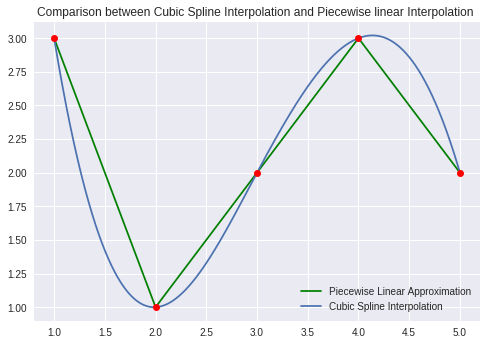

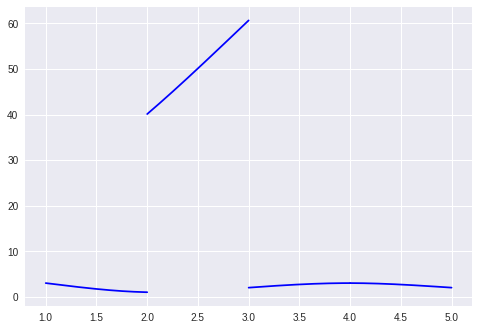

In [8]:
x = [1,2,3,4,5]
y = [3,1,2,3,2]
cs = CubicSpline(x,y)

point1 = (1, 3)
point2 = (2, 1)
point3 = (3, 2)
point4 = (4, 3)
point5 = (5, 2)


plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(1,2,0.0001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r),'g', label="Piecewise Linear Approximation")

r = np.arange(2,3,0.0001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(3,4,0.0001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(4,5,0.0001)
f = linearLagrange(point4, point5)
plt.plot(r, f(r), 'g')

r = np.arange(1,5,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')
plt.legend()
plt.show()

x = np.arange(1,2,0.0001)
plt.plot(x, (0.76786*(x**3)) - (2.3036*(x**2)) - (0.46429*x) + 5.0000,'b')
x = np.arange(2,3,0.0001)
plt.plot(x, (-0.83929*x**3) + (7.3393*x**2) - (0.19750*x) + 17.857,'b')
x = np.arange(3,4,0.0001)
plt.plot(x, (-0.41071*x**3) + (3.4821*x**2) - (8.1786*x) + 6.2857,'b')
x = np.arange(4,5,0.0001)
plt.plot(x, (.48214*x**3) - (7.2321*x**2) + (34.679*x) - 50.857,'b')
plt.show()

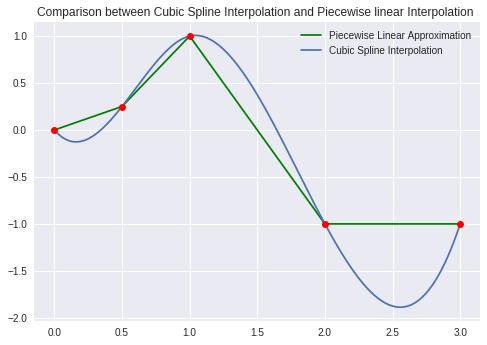

In [9]:
x = [0,1/2,1,2,3]
y = [0,1/4,1,-1,-1]
cs = CubicSpline(x,y)

point1 = (0, 0)
point2 = (1/2, 1/4)
point3 = (1, 1)
point4 = (2, -1)
point5 = (3, -1)


plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(0,1/2,0.0001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r),'g', label="Piecewise Linear Approximation")

r = np.arange(1/2,1,0.0001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(1,2,0.0001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(2,3,0.0001)
f = linearLagrange(point4, point5)
plt.plot(r, f(r), 'g')

r = np.arange(0,3,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')
plt.legend()
plt.show()

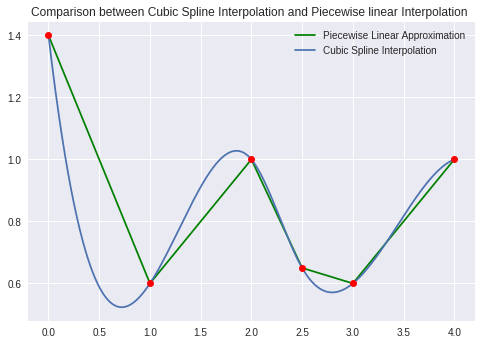

In [10]:
x = [0,1,2,2.5,3,4]
y = [1.4,0.6,1.0,0.65,0.6,1.0]
cs = CubicSpline(x,y)

point1 = (0, 1.4)
point2 = (1, 0.6)
point3 = (2, 1.0)
point4 = (2.5,0.65)
point5 = (3, 0.6)
point6 = (4, 1.0)


plt.title("Comparison between Cubic Spline Interpolation and Piecewise linear Interpolation ")

r = np.arange(0,1,0.0001)
f = linearLagrange(point1, point2)
plt.plot(r, f(r),'g', label="Piecewise Linear Approximation")

r = np.arange(1,2,0.0001)
f = linearLagrange(point2, point3)
plt.plot(r, f(r), 'g')

r = np.arange(2,2.5,0.0001)
f = linearLagrange(point3, point4)
plt.plot(r, f(r), 'g')

r = np.arange(2.5,3,0.0001)
f = linearLagrange(point4, point5)
plt.plot(r, f(r), 'g')

r = np.arange(3,4,0.0001)
f = linearLagrange(point5, point6)
plt.plot(r, f(r), 'g')

r = np.arange(0,4,0.001)
plt.plot(r, cs(r), label="Cubic Spline Interpolation")
plt.plot(x, y, 'ro')
plt.legend()
plt.show()

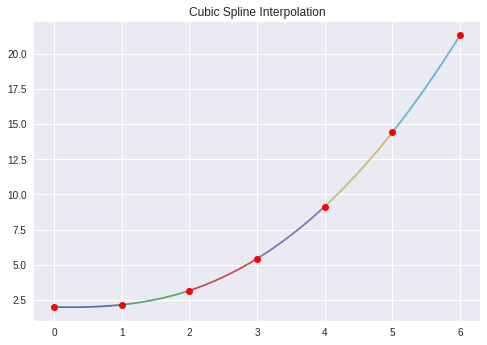

In [11]:
x = [0,1,2,3,4,5,6]
y = [2, 2.1592, 3.169, 5.4332, 9.1411, 14.406, 21.303]
cs = CubicSpline(x,y)


plt.title("Cubic Spline Interpolation")
r = np.arange(0,1,0.001)
plt.plot(r, cs(r))
r = np.arange(1,2,0.001)
plt.plot(r, cs(r))
r = np.arange(2,3,0.001)
plt.plot(r, cs(r))
r = np.arange(3,4,0.001)
plt.plot(r, cs(r))
r = np.arange(4,5,0.001)
plt.plot(r, cs(r))
r = np.arange(5,6,0.001)
plt.plot(r, cs(r))
plt.plot(x, y, 'ro')
plt.show()

# plt.title("Cubic Spline Interpolation")
# r = np.arange(0,6,0.001)
# plt.plot(r, cs(r))
# plt.plot(x, y, 'ro')
# plt.show()

In [0]:
def quadLagrange(point1, point2, point3):
  x0, y0 = point1
  x1, y1 = point2
  x2, y2 = point3
  func = lambda x: (((x-x1)*(x-x2)*y0)/((x0-x1)*(x0-x2))) + (((x-x0)*(x-x2)*y1)/((x1-x0)*(x1-x2))) + (((x-x0)*(x-x1)*y2)/((x2-x0)*(x2-x1)))
  return func

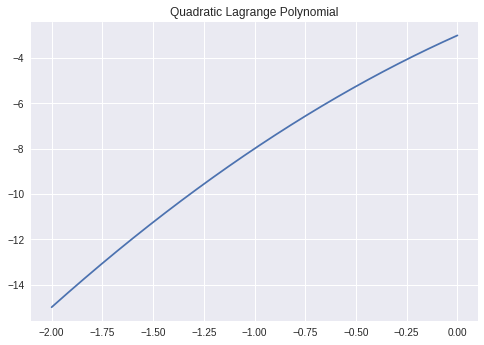

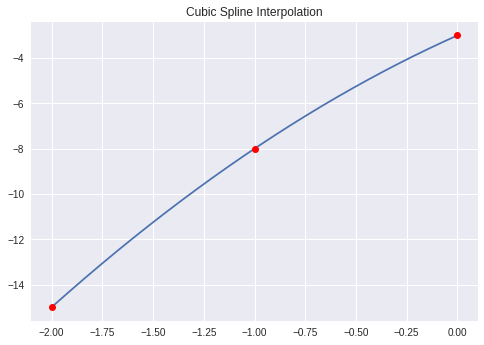

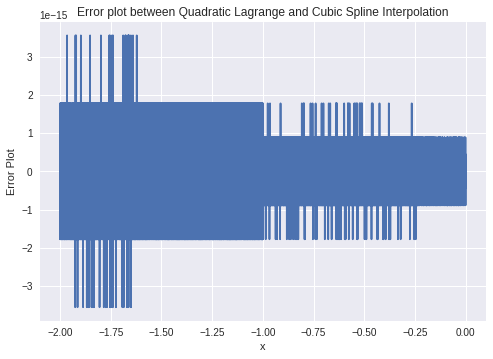

In [13]:
point1 = [-2,-15]
point2 = [-1,-8 ]
point3 = [ 0,-3 ]

x0,y0 = point1
x1,y1 = point2
x2,y2 = point3

f1 = quadLagrange(point1, point2, point3)
r = np.arange(-2,0,0.0001)
plt.title('Quadratic Lagrange Polynomial')
plt.plot(r, f1(r))
plt.show()


x = [x0,x1,x2]
y = [y0,y1,y2]
cs = CubicSpline(x,y)

r = np.arange(-2,0,0.0001)
plt.title("Cubic Spline Interpolation")
plt.plot(r, cs(r))
plt.plot(x, y, 'ro')
plt.show()

plt.title("Error plot between Quadratic Lagrange and Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("Error Plot")
plt.plot(r, cs(r)-f1(r))
plt.show()

In [0]:
import math
import pandas as pd

def T_n(n, a, b, f):
  h    = (b-a)/n;
  vals = np.linspace(a,b,n+1)
  Tn = 0.5*(f(vals[0]) + f(vals[n]))
  for i in range(1,n):
      Tn = Tn +  f(vals[i])    
  Tn = Tn*h
  return Tn

In [0]:
def S_n(n, a, b, f):
  h    = (b-a)/n;
  vals = np.linspace(a,b,n+1)
  Tn = (f(vals[0]) + f(vals[n]))
  for i in range(1,n):
    if(i%2 == 0):
      Tn = Tn +  (2*f(vals[i]))
    else:
      Tn = Tn +  (4*f(vals[i]))  
  Tn = Tn*(h/3)
  return Tn

In [16]:
actual = (np.exp(math.pi) -1)/17
f = lambda x: np.exp(x)*np.cos(4*x) 

table = pd.DataFrame(columns=['n', 'Actual Value', 'T(n)', 'T(n) Error', 'S(n)', 'S(n) Error'])

a = 0
b = math.pi
i = 2
j = 1
while(i <= 512):
  n = i
  Tn = T_n(n, a, b, f)
  Sn = S_n(n, a, b, f)
  table.loc[j] = [n, actual, Tn, Tn-actual, Sn, Sn-actual]
  i = i*2
  j +=1
  
table

,n,Actual Value,T(n),T(n) Error,S(n),S(n) Error
1,2.0,1.302394,26.516336,25.213942,22.715077,2.141268e+01
2,4.0,1.302394,3.249050,1.946657,-4.506711,-5.809105e+00
3,8.0,1.302394,1.624525,0.322132,1.083017,-2.193769e-01
4,16.0,1.302394,1.375723,0.073329,1.292788,-9.605410e-03
5,32.0,1.302394,1.320312,0.017918,1.301842,-5.520189e-04
6,64.0,1.302394,1.306848,0.004454,1.302360,-3.379643e-05
7,128.0,1.302394,1.303506,0.001112,1.302392,-2.101451e-06
8,256.0,1.302394,1.302672,0.000278,1.302394,-1.311722e-07
9,512.0,1.302394,1.302463,0.000069,1.302394,-8.195639e-09


In [17]:
actual = 2/7
f = lambda x: x**2.5

table = pd.DataFrame(columns=['n', 'Actual Value', 'T(n)', 'T(n) Error', 'S(n)', 'S(n) Error'])

a = 0
b = 1
i = 2
j = 1
while(i <= 512):
  n = i
  Tn = T_n(n, a, b, f)
  Sn = S_n(n, a, b, f)
  table.loc[j] = [n, actual, Tn, Tn-actual, Sn, Sn-actual]
  i = i*2
  j +=1
  
table

,n,Actual Value,T(n),T(n) Error,S(n),S(n) Error
1,2.0,0.285714,0.338388,5.267406e-02,0.284518,-1.196489e-03
2,4.0,0.285714,0.298791,1.307721e-02,0.285593,-1.217400e-04
3,8.0,0.285714,0.288975,3.260454e-03,0.285702,-1.179823e-05
4,16.0,0.285714,0.286529,8.142822e-04,0.285713,-1.108410e-06
5,32.0,0.285714,0.285918,2.034940e-04,0.285714,-1.020813e-07
6,64.0,0.285714,0.285765,5.086654e-05,0.285714,-9.279914e-09
7,128.0,0.285714,0.285727,1.271601e-05,0.285714,-8.363088e-10
8,256.0,0.285714,0.285717,3.178946e-06,0.285714,-7.492457e-11
9,512.0,0.285714,0.285715,7.947314e-07,0.285714,-6.685430e-12


In [18]:
actual = math.atan(5 - math.pi) + math.atan(math.pi)
f = lambda x: 1/(1 + (x-math.pi)**2)

table = pd.DataFrame(columns=['n', 'Actual Value', 'T(n)', 'T(n) Error', 'S(n)', 'S(n) Error'])

a = 0
b = 5
i = 2
j = 1
while(i <= 512):
  n = i
  Tn = T_n(n, a, b, f)
  Sn = S_n(n, a, b, f)
  table.loc[j] = [n, actual, Tn, Tn-actual, Sn, Sn-actual]
  i = i*2
  j +=1
  
table

,n,Actual Value,T(n),T(n) Error,S(n),S(n) Error
1,2.0,2.339766,2.166655,-0.173111,2.625095,2.853292e-01
2,4.0,2.339766,2.268668,-0.071099,2.302672,-3.709437e-02
3,8.0,2.339766,2.332270,-0.007496,2.353471,1.370512e-02
4,16.0,2.339766,2.337813,-0.001953,2.339660,-1.059309e-04
5,32.0,2.339766,2.339277,-0.000489,2.339765,-1.079988e-06
6,64.0,2.339766,2.339644,-0.000122,2.339766,-6.743238e-08
7,128.0,2.339766,2.339736,-0.000031,2.339766,-4.216920e-09
8,256.0,2.339766,2.339759,-0.000008,2.339766,-2.635927e-10
9,512.0,2.339766,2.339764,-0.000002,2.339766,-1.647482e-11


In [19]:
f = lambda x: np.exp(-1*x**2)

table = pd.DataFrame(columns=['n', 'T(n)', 'S(n)'])

a = 0
b = 10
i = 4
j = 1
while(i <= 512):
  n = i
  Tn = T_n(n, a, b, f)
  Sn = S_n(n, a, b, f)
  table.loc[j] = [n, Tn, Sn]
  i = i*2
  j +=1
  
table

,n,T(n),S(n)
1,4.0,1.254826,0.839768
2,8.0,0.889428,0.767629
3,16.0,0.886227,0.885160
4,32.0,0.886227,0.886227
5,64.0,0.886227,0.886227
6,128.0,0.886227,0.886227
7,256.0,0.886227,0.886227
8,512.0,0.886227,0.886227


In [20]:
f = lambda x: np.arctan(1 + (x**2))

table = pd.DataFrame(columns=['n', 'T(n)', 'S(n)'])

a = 0
b = 2
i = 4
j = 1
while(i <= 512):
  n = i
  Tn = T_n(n, a, b, f)
  Sn = S_n(n, a, b, f)
  table.loc[j] = [n, Tn, Sn]
  i = i*2
  j +=1
  
table

,n,T(n),S(n)
1,4.0,2.177450,2.174418
2,8.0,2.175061,2.174265
3,16.0,2.174461,2.174261
4,32.0,2.174311,2.174261
5,64.0,2.174274,2.174261
6,128.0,2.174264,2.174261
7,256.0,2.174262,2.174261
8,512.0,2.174261,2.174261


In [0]:
def fd(f, x, h):
  d = (f(x+h)-f(x))/h
  return d

def cd(f, x, h):
  d = (f(x+h)-f(x-h))/(2*h)
  return d

In [22]:
f = lambda x: np.arctan(x**2 -x +1)
h = 0.1
actual = 0.5
table = pd.DataFrame(columns=['h', 'Actual', 'Forward Difference', 'Error',  'Central Difference', 'Error'])

for i in range(5):
  table.loc[i+1] = [h, actual, fd(f,1,h), fd(f,1,h)-actual, cd(f, 1, h), cd(f, 1, h)-actual]
  h *= 0.5
  
table

,h,Actual,Forward Difference,Error,Central Difference,Error
1,0.10000,0.5,0.520855,0.020855,0.495856,-0.004144
2,0.05000,0.5,0.511460,0.011460,0.498960,-0.001040
3,0.02500,0.5,0.505990,0.005990,0.499740,-0.000260
4,0.01250,0.5,0.503060,0.003060,0.499935,-0.000065
5,0.00625,0.5,0.501546,0.001546,0.499984,-0.000016


In [23]:
f = lambda x: np.arctan(100*x**2 -199*x + 100)
h = 0.1
actual = 0.5
table = pd.DataFrame(columns=['h', 'Actual', 'Forward Difference', 'Error',  'Central Difference', 'Error'])

for i in range(5):
  table.loc[i+1] = [h, actual, fd(f,1,h), fd(f,1,h)-actual, cd(f, 1, h), cd(f, 1, h)-actual]
  h *= 0.5
  
table

,h,Actual,Forward Difference,Error,Central Difference,Error
1,0.10000,0.5,3.409790,2.909790,0.200294,-0.299706
2,0.05000,0.5,2.594051,2.094051,0.390426,-0.109574
3,0.02500,0.5,1.675666,1.175666,0.469776,-0.030224
4,0.01250,0.5,1.109328,0.609328,0.492262,-0.007738
5,0.00625,0.5,0.808388,0.308388,0.498054,-0.001946


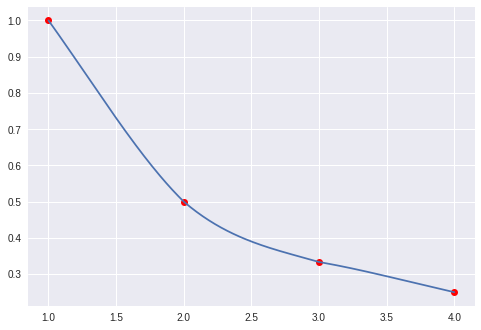

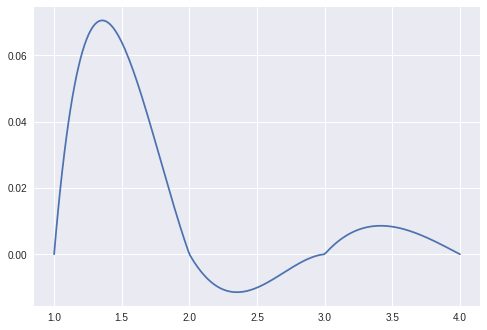

In [24]:
def cubic_interp1d(x0, x, y):
    
    x = np.asfarray(x)
    y = np.asfarray(y)

    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

x = [1,2,3,4]
y = [1,1/2,1/3,1/4]
plt.plot(x, y, 'ro')
x_new = np.linspace(1, 4, 201)
plt.plot(x_new, cubic_interp1d(x_new, x, y))
plt.show()
plt.plot(x_new, cubic_interp1d(x_new, x, y)-(1/x_new))
plt.show()
